# Modeling

In [1]:
from datetime import datetime
start_time = datetime.now()

# Libraries to load
# !pip install lightgbm

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('LOAD DURATION: ', datetime.now() - start_time) # load time about 30 seconds

LOAD DURATION:  0:00:03.171064


In [2]:
%%time
vars = pd.read_csv('new_hw10vars.csv')

vars = vars.loc[: , ['Cardnum_total_0', 'Cardnum_total_1','Cardnum_total_3','Cardnum_total_7','Cardnum_total_14', 
              'card_state_total_1', 'card_state_total_3', 'card_state_total_7', 'card_state_total_14', 
              'card_zip_total_1','card_zip_total_3', 'card_zip_total_7', 'card_zip_total_14', 'card_zip_total_30', 
              'card_merch_total_1', 'card_merch_total_3', 'card_merch_total_7', 'card_merch_total_14', 
              'card_merch_total_30', 'merch_state_total_1', 'Recnum','Fraud']]
print(vars.shape)
vars.head()

(96397, 22)
CPU times: user 6.35 s, sys: 1.04 s, total: 7.4 s
Wall time: 7.53 s


,Cardnum_total_0,Cardnum_total_1,Cardnum_total_3,Cardnum_total_7,Cardnum_total_14,card_state_total_1,card_state_total_3,card_state_total_7,card_state_total_14,card_zip_total_1,...,card_zip_total_14,card_zip_total_30,card_merch_total_1,card_merch_total_3,card_merch_total_7,card_merch_total_14,card_merch_total_30,merch_state_total_1,Recnum,Fraud
0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,1,0
1,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,...,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,2,0
2,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,...,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,3,0
3,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,7.24,4,0
4,7.24,7.24,7.24,7.24,7.24,7.24,7.24,7.24,7.24,7.24,...,7.24,7.24,7.24,7.24,7.24,7.24,7.24,10.86,5,0


In [3]:
vars.shape

(96397, 22)

In [4]:
# use this to cap variables. For some problems it helps
Clip = 10

In [5]:
# vars.rename(columns={'fraud_label':'Fraud'},inplace=True)

In [6]:
vars['Fraud'].sum()

1059

In [7]:
vars.head(10)

,Cardnum_total_0,Cardnum_total_1,Cardnum_total_3,Cardnum_total_7,Cardnum_total_14,card_state_total_1,card_state_total_3,card_state_total_7,card_state_total_14,card_zip_total_1,...,card_zip_total_14,card_zip_total_30,card_merch_total_1,card_merch_total_3,card_merch_total_7,card_merch_total_14,card_merch_total_30,merch_state_total_1,Recnum,Fraud
0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,1,0
1,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,...,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,2,0
2,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,...,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,3,0
3,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,7.24,4,0
4,7.24,7.24,7.24,7.24,7.24,7.24,7.24,7.24,7.24,7.24,...,7.24,7.24,7.24,7.24,7.24,7.24,7.24,10.86,5,0
5,3.67,3.67,3.67,3.67,3.67,3.67,3.67,3.67,3.67,3.67,...,3.67,3.67,3.67,3.67,3.67,3.67,3.67,14.53,6,0
6,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,18.15,7,0
7,230.32,230.32,230.32,230.32,230.32,230.32,230.32,230.32,230.32,230.32,...,230.32,230.32,230.32,230.32,230.32,230.32,230.32,230.32,8,0
8,62.11,62.11,62.11,62.11,62.11,62.11,62.11,62.11,62.11,62.11,...,62.11,62.11,62.11,62.11,62.11,62.11,62.11,62.11,9,0
9,10.86,10.86,10.86,10.86,10.86,10.86,10.86,10.86,10.86,10.86,...,10.86,10.86,10.86,10.86,10.86,10.86,10.86,21.77,10,0


In [8]:
vars.shape

(96397, 22)

In [9]:
vars.describe()

,Cardnum_total_0,Cardnum_total_1,Cardnum_total_3,Cardnum_total_7,Cardnum_total_14,card_state_total_1,card_state_total_3,card_state_total_7,card_state_total_14,card_zip_total_1,...,card_zip_total_14,card_zip_total_30,card_merch_total_1,card_merch_total_3,card_merch_total_7,card_merch_total_14,card_merch_total_30,merch_state_total_1,Recnum,Fraud
count,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,...,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000
mean,741.645565,1110.045587,1512.932952,2384.036098,3768.183808,658.801075,737.869736,902.263993,1150.539713,605.584869,...,805.398964,989.355309,599.824086,631.592947,691.248912,773.478689,930.102629,1124.903699,48365.481820,0.010986
std,3431.446131,5669.434127,6115.505329,7158.500841,9421.917379,4054.415369,4120.864187,4246.471258,4507.600609,4022.504312,...,4186.589280,4345.734883,4020.452418,4063.110709,4104.238743,4170.834510,4306.518987,4362.985595,27945.003883,0.104236
min,0.010000,0.010000,0.010000,0.140000,0.140000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,1.000000,0.000000
25%,60.000000,90.000000,140.000000,292.400000,556.340000,55.440000,65.480000,87.500000,113.560000,51.000000,...,84.900000,105.240000,50.000000,55.250000,65.710000,77.350000,94.290000,118.000000,24154.000000,0.000000
50%,220.000000,339.160000,518.610000,986.140000,1723.640000,189.980000,216.500000,280.000000,365.270000,171.600000,...,256.450000,321.000000,168.000000,179.950000,203.470000,238.780000,291.750000,395.560000,48365.000000,0.000000
75%,685.650000,1043.110000,1550.000000,2566.000000,4093.250000,577.200000,659.000000,837.440000,1091.360000,520.000000,...,716.560000,902.190000,512.550000,545.010000,600.000000,681.930000,834.640000,1135.840000,72578.000000,0.000000
max,218301.830000,307468.060000,310843.060000,312616.060000,313995.060000,306633.410000,306633.410000,306633.410000,306633.410000,306633.410000,...,306633.410000,306633.410000,306633.410000,306633.410000,306633.410000,306633.410000,306633.410000,306633.410000,96753.000000,1.000000


In [10]:
record_save = vars['Recnum']
Y_save = pd.DataFrame(vars.loc[:,'Fraud'])
Y_save.head()

,Fraud
0,0
1,0
2,0
3,0
4,0


## Scale and truncate field values

In [11]:
X_no_scaling = vars.drop(columns = ['Recnum','Fraud'])
X_no_scaling.describe()

,Cardnum_total_0,Cardnum_total_1,Cardnum_total_3,Cardnum_total_7,Cardnum_total_14,card_state_total_1,card_state_total_3,card_state_total_7,card_state_total_14,card_zip_total_1,card_zip_total_3,card_zip_total_7,card_zip_total_14,card_zip_total_30,card_merch_total_1,card_merch_total_3,card_merch_total_7,card_merch_total_14,card_merch_total_30,merch_state_total_1
count,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000
mean,741.645565,1110.045587,1512.932952,2384.036098,3768.183808,658.801075,737.869736,902.263993,1150.539713,605.584869,641.696503,710.502552,805.398964,989.355309,599.824086,631.592947,691.248912,773.478689,930.102629,1124.903699
std,3431.446131,5669.434127,6115.505329,7158.500841,9421.917379,4054.415369,4120.864187,4246.471258,4507.600609,4022.504312,4066.606386,4112.186652,4186.589280,4345.734883,4020.452418,4063.110709,4104.238743,4170.834510,4306.518987,4362.985595
min,0.010000,0.010000,0.010000,0.140000,0.140000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,60.000000,90.000000,140.000000,292.400000,556.340000,55.440000,65.480000,87.500000,113.560000,51.000000,58.290000,70.400000,84.900000,105.240000,50.000000,55.250000,65.710000,77.350000,94.290000,118.000000
50%,220.000000,339.160000,518.610000,986.140000,1723.640000,189.980000,216.500000,280.000000,365.270000,171.600000,185.520000,215.000000,256.450000,321.000000,168.000000,179.950000,203.470000,238.780000,291.750000,395.560000
75%,685.650000,1043.110000,1550.000000,2566.000000,4093.250000,577.200000,659.000000,837.440000,1091.360000,520.000000,556.430000,621.980000,716.560000,902.190000,512.550000,545.010000,600.000000,681.930000,834.640000,1135.840000
max,218301.830000,307468.060000,310843.060000,312616.060000,313995.060000,306633.410000,306633.410000,306633.410000,306633.410000,306633.410000,306633.410000,306633.410000,306633.410000,306633.410000,306633.410000,306633.410000,306633.410000,306633.410000,306633.410000,306633.410000


In [12]:
X = (X_no_scaling - X_no_scaling.mean()) / X_no_scaling.std()

In [13]:
# push in any outlier values
cols = X.columns
X.loc[:,cols] = X[cols].clip(upper=Clip)
X.loc[:,cols] = X[cols].clip(lower=-1*Clip)
# X = (X_no_scaling - X_no_scaling.mean()) / X_no_scaling.std()
X.describe()

,Cardnum_total_0,Cardnum_total_1,Cardnum_total_3,Cardnum_total_7,Cardnum_total_14,card_state_total_1,card_state_total_3,card_state_total_7,card_state_total_14,card_zip_total_1,card_zip_total_3,card_zip_total_7,card_zip_total_14,card_zip_total_30,card_merch_total_1,card_merch_total_3,card_merch_total_7,card_merch_total_14,card_merch_total_30,merch_state_total_1
count,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000
mean,-0.015303,-0.016958,-0.016033,-0.014465,-0.013169,-0.012398,-0.012330,-0.012043,-0.011538,-0.012554,-0.012608,-0.012515,-0.012247,-0.011520,-0.012565,-0.012627,-0.012558,-0.012329,-0.011710,-0.011512
std,0.563192,0.541879,0.603512,0.694553,0.771249,0.449155,0.473886,0.517611,0.586084,0.433062,0.448165,0.466324,0.496054,0.553797,0.431967,0.446373,0.462533,0.489352,0.540337,0.558051
min,-0.216129,-0.195793,-0.247391,-0.333016,-0.399923,-0.162487,-0.179055,-0.212471,-0.255242,-0.150547,-0.157794,-0.172777,-0.192374,-0.227659,-0.149191,-0.155443,-0.168421,-0.185447,-0.215973,-0.257827
25%,-0.198647,-0.179920,-0.224500,-0.292189,-0.340891,-0.148816,-0.163167,-0.191868,-0.230051,-0.137871,-0.143463,-0.155660,-0.172097,-0.203444,-0.136757,-0.141848,-0.152413,-0.166904,-0.194081,-0.230783
50%,-0.152019,-0.135972,-0.162590,-0.195278,-0.216999,-0.115632,-0.126520,-0.146537,-0.174210,-0.107889,-0.112176,-0.120496,-0.131121,-0.153796,-0.107407,-0.111157,-0.118848,-0.128199,-0.148229,-0.167166
75%,-0.016318,-0.011806,0.006061,0.025419,0.034501,-0.020126,-0.019139,-0.015265,-0.013129,-0.021277,-0.020967,-0.021527,-0.021220,-0.020058,-0.021708,-0.021310,-0.022233,-0.021950,-0.022167,0.002507
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [14]:
# separate data into modeling (traintest) and out of time
oot_recnum=84300
X_trntst = X[0:oot_recnum]
Y_trntst = Y_save[0:oot_recnum]
X_oot = X[oot_recnum:]
Y_oot = Y_save[oot_recnum:]

In [15]:
niter = 0
nitermax = 10
FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
X_oot_orig = X_oot.copy()
pd.options.mode.chained_assignment = None  # default='warn'

## Models

In [16]:
%%time
# NN

for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3, stratify=Y_trntst)

    model = MLPClassifier(hidden_layer_sizes=(110,1),activation='logistic')
#     
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    
print(FDR3.mean())

0 0.7727272727272727 0.7575757575757576 0.5754189944134078
1 0.7857142857142857 0.7462121212121212 0.5810055865921788
2 0.7792207792207793 0.7159090909090909 0.5698324022346368
3 0.7987012987012987 0.7196969696969697 0.5977653631284916
4 0.7694805194805194 0.7765151515151515 0.5642458100558659
5 0.7727272727272727 0.75 0.5642458100558659
6 0.7775974025974026 0.7272727272727273 0.6089385474860335
7 0.7824675324675324 0.7196969696969697 0.5698324022346368
8 0.7792207792207793 0.7575757575757576 0.5698324022346368
9 0.7905844155844156 0.7272727272727273 0.6256983240223464
trn    0.780844
tst    0.739773
oot    0.582682
dtype: float64
CPU times: user 19min 39s, sys: 2min 8s, total: 21min 47s
Wall time: 5min 36s


# Time dependence_merchnum

In [21]:
data = pd.read_csv('card transactions.csv')
vars_card = pd.read_csv('new_hw10vars.csv')

In [22]:
card = data.merge(vars_card, on='Recnum')
card = card.rename(columns={"Fraud_x": "Fraud"})

In [23]:
Merchnum = '4353000719908'
card = card.loc[(card['Merchnum'] == Merchnum)&(card['Date_x'] >= '2006-11-01')]
card = card.loc[: ,['Cardnum_total_0', 'Cardnum_total_1','Cardnum_total_3','Cardnum_total_7','Cardnum_total_14', 
              'card_state_total_1', 'card_state_total_3', 'card_state_total_7', 'card_state_total_14', 
              'card_zip_total_1','card_zip_total_3', 'card_zip_total_7', 'card_zip_total_14', 'card_zip_total_30', 
              'card_merch_total_1', 'card_merch_total_3', 'card_merch_total_7', 'card_merch_total_14', 
              'card_merch_total_30', 'merch_state_total_1','Merchnum','Date_x', 'Recnum','Fraud']]

In [24]:
record_save = card['Recnum']
Y_card_save = pd.DataFrame(card.loc[:,'Fraud'])
Y_card_save.head()

,Fraud
84104,0
84124,0
84194,0
84283,0
84341,0


In [25]:
X_card_no_scaling = card.drop(columns = ['Recnum','Fraud','Merchnum','Date_x'])
X_card_no_scaling.describe()

,Cardnum_total_0,Cardnum_total_1,Cardnum_total_3,Cardnum_total_7,Cardnum_total_14,card_state_total_1,card_state_total_3,card_state_total_7,card_state_total_14,card_zip_total_1,card_zip_total_3,card_zip_total_7,card_zip_total_14,card_zip_total_30,card_merch_total_1,card_merch_total_3,card_merch_total_7,card_merch_total_14,card_merch_total_30,merch_state_total_1
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,1971.324093,3916.045285,4245.208135,4954.440259,6016.638446,3649.703938,3794.046736,4149.802280,4567.270881,3649.703938,3792.369067,4144.871088,4559.428187,4754.275648,3649.703938,3792.369067,4144.871088,4559.428187,4742.358549,4081.377358
std,4621.486442,8993.924586,8930.591969,8804.547262,9113.641058,9062.111131,9019.626886,8946.616116,8939.566394,9062.111131,9020.296116,8948.756652,8943.269936,8959.247749,9062.111131,9020.296116,8948.756652,8943.269936,8963.879733,8913.130993
min,3.950000,11.190000,11.190000,21.420000,24.920000,3.950000,3.950000,3.950000,3.950000,3.950000,3.950000,3.950000,3.950000,10.390000,3.950000,3.950000,3.950000,3.950000,10.390000,18.950000
25%,62.090000,95.950000,140.870000,270.730000,570.400000,56.950000,58.550000,70.760000,77.970000,56.950000,58.550000,69.860000,73.940000,84.750000,56.950000,58.550000,69.860000,73.940000,84.750000,422.270000
50%,210.840000,460.990000,831.690000,1875.640000,2735.220000,182.100000,237.600000,262.920000,277.270000,182.100000,233.340000,240.950000,262.920000,277.270000,182.100000,233.340000,240.950000,262.920000,270.000000,930.170000
75%,807.380000,1448.960000,2092.460000,3620.930000,5965.480000,774.660000,1355.160000,3056.040000,5075.770000,774.660000,1355.160000,3056.040000,5075.770000,5741.150000,774.660000,1355.160000,3056.040000,5075.770000,5741.150000,1522.060000
max,22651.090000,41488.580000,41488.580000,41488.580000,41816.050000,41488.580000,41488.580000,41488.580000,41488.580000,41488.580000,41488.580000,41488.580000,41488.580000,41488.580000,41488.580000,41488.580000,41488.580000,41488.580000,41488.580000,41488.580000


In [26]:
X_card = (X_card_no_scaling - X_card_no_scaling.mean()) / X_card_no_scaling.std()
X_card.head()

,Cardnum_total_0,Cardnum_total_1,Cardnum_total_3,Cardnum_total_7,Cardnum_total_14,card_state_total_1,card_state_total_3,card_state_total_7,card_state_total_14,card_zip_total_1,card_zip_total_3,card_zip_total_7,card_zip_total_14,card_zip_total_30,card_merch_total_1,card_merch_total_3,card_merch_total_7,card_merch_total_14,card_merch_total_30,merch_state_total_1
84104,-0.418780,-0.431414,-0.471331,-0.558632,-0.656236,-0.398777,-0.416659,-0.459823,-0.506885,-0.398777,-0.416442,-0.459162,-0.505798,-0.526644,-0.398777,-0.416442,-0.459162,-0.505798,-0.525043,-0.453874
84124,-0.419195,-0.431628,-0.471546,-0.558850,-0.647035,-0.398989,-0.416872,-0.460038,-0.497505,-0.398989,-0.416655,-0.459377,-0.506013,-0.526858,-0.398989,-0.416655,-0.459377,-0.506013,-0.525257,-0.450057
84194,-0.335287,-0.388512,-0.428125,-0.389610,-0.484717,-0.356198,-0.373879,-0.416694,-0.463722,-0.356198,-0.373665,-0.416043,-0.462653,-0.483576,-0.356198,-0.373665,-0.416043,-0.462653,-0.481996,-0.402734
84283,-0.414233,-0.429078,-0.468979,-0.556246,-0.618282,-0.396459,-0.414329,-0.457475,-0.500552,-0.396459,-0.414113,-0.456814,-0.499468,-0.255063,-0.396459,-0.414113,-0.456814,-0.499468,-0.253602,-0.396344
84341,-0.421921,-0.433028,-0.472957,-0.560281,-0.643713,-0.400380,-0.418269,-0.461446,-0.508509,-0.400380,-0.418052,-0.460785,-0.507422,-0.528265,-0.400380,-0.418052,-0.460785,-0.507422,-0.526662,-0.393941


In [27]:

# push in any outlier values
cols = X_card.columns
X_card.loc[:,cols] = X_card[cols].clip(upper=Clip)
X_card.loc[:,cols] = X_card[cols].clip(lower=-1*Clip)
# X = (X_no_scaling - X_no_scaling.mean()) / X_no_scaling.std()
X_card.describe()

,Cardnum_total_0,Cardnum_total_1,Cardnum_total_3,Cardnum_total_7,Cardnum_total_14,card_state_total_1,card_state_total_3,card_state_total_7,card_state_total_14,card_zip_total_1,card_zip_total_3,card_zip_total_7,card_zip_total_14,card_zip_total_30,card_merch_total_1,card_merch_total_3,card_merch_total_7,card_merch_total_14,card_merch_total_30,merch_state_total_1
count,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02
mean,-9.203921e-18,5.890510e-16,7.673770e-16,-1.023936e-16,8.548142e-16,7.337251e-16,7.409157e-16,3.865647e-16,2.674890e-16,7.337251e-16,7.771561e-16,2.686395e-16,2.099645e-16,4.141765e-16,7.337251e-16,7.771561e-16,2.686395e-16,2.099645e-16,4.817678e-16,-4.449521e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.257016e-01,-4.341659e-01,-4.741027e-01,-5.602810e-01,-6.574451e-01,-4.023074e-01,-4.202055e-01,-4.633989e-01,-5.104633e-01,-4.023074e-01,-4.199883e-01,-4.627370e-01,-5.093750e-01,-5.294960e-01,-4.023074e-01,-4.199883e-01,-4.627370e-01,-5.093750e-01,-5.278929e-01,-4.557801e-01
25%,-4.131212e-01,-4.247418e-01,-4.595819e-01,-5.319649e-01,-5.975919e-01,-3.964588e-01,-4.141520e-01,-4.559313e-01,-5.021833e-01,-3.964588e-01,-4.139353e-01,-4.553718e-01,-5.015490e-01,-5.211962e-01,-3.964588e-01,-4.139353e-01,-4.553718e-01,-5.015490e-01,-5.195974e-01,-4.105300e-01
50%,-3.809346e-01,-3.841544e-01,-3.822275e-01,-3.496830e-01,-3.600557e-01,-3.826486e-01,-3.943009e-01,-4.344528e-01,-4.798891e-01,-3.826486e-01,-3.945579e-01,-4.362529e-01,-4.804180e-01,-4.997078e-01,-3.826486e-01,-3.945579e-01,-4.362529e-01,-4.804180e-01,-4.989311e-01,-3.535466e-01
75%,-2.518549e-01,-2.743058e-01,-2.410532e-01,-1.514570e-01,-5.613393e-03,-3.172598e-01,-2.703977e-01,-1.222543e-01,5.688185e-02,-3.172598e-01,-2.701917e-01,-1.216740e-01,5.773524e-02,1.101515e-01,-3.172598e-01,-2.701917e-01,-1.216740e-01,5.773524e-02,1.114240e-01,-2.871401e-01
max,4.474700e+00,4.177546e+00,4.170314e+00,4.149463e+00,3.928113e+00,4.175503e+00,4.179168e+00,4.173508e+00,4.130101e+00,4.175503e+00,4.179044e+00,4.173061e+00,4.129267e+00,4.100155e+00,4.175503e+00,4.179044e+00,4.173061e+00,4.129267e+00,4.099366e+00,4.196864e+00


In [28]:
niter = 0
nitermax = 10

In [29]:
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

model = MLPClassifier(hidden_layer_sizes=(110,1),activation='logistic')

X_oot = X_oot_orig.copy()
X_trn_save = X_trn.copy()
Y_trn_save = Y_trn.copy()

model.fit(X_trn, Y_trn.values.ravel())

predictions = model.predict_proba(X_card)[:,1]

In [30]:
X_card['predicted']=predictions

In [31]:
X_card = X_card.merge(card, left_on=X_card.index, right_on=card.index, how='left')

In [32]:
X_card['Date_x'] = X_card['Date_x'].astype('datetime64[ns]')
X_card['Date_md'] = X_card['Date_x'].dt.strftime('%m/%d')

In [33]:
df = X_card.groupby('Date_md').count()
df['sum'] = df['key_0'].cumsum()
df['result'] = X_card.groupby('Date_md')['predicted'].mean()
df = df[['key_0','sum','result']]
df

,key_0,sum,result
Date_md,,,
11/01,2,2,0.001204
11/02,5,7,0.001199
11/03,1,8,0.001193
11/04,5,13,0.001195
11/06,2,15,0.001203
11/08,3,18,0.001202
11/09,2,20,0.001192
11/10,3,23,0.001197
11/12,2,25,0.001196


In [34]:
df2 = df.iloc[:23]
df2

,key_0,sum,result
Date_md,,,
11/01,2,2,0.001204
11/02,5,7,0.001199
11/03,1,8,0.001193
11/04,5,13,0.001195
11/06,2,15,0.001203
11/08,3,18,0.001202
11/09,2,20,0.001192
11/10,3,23,0.001197
11/12,2,25,0.001196


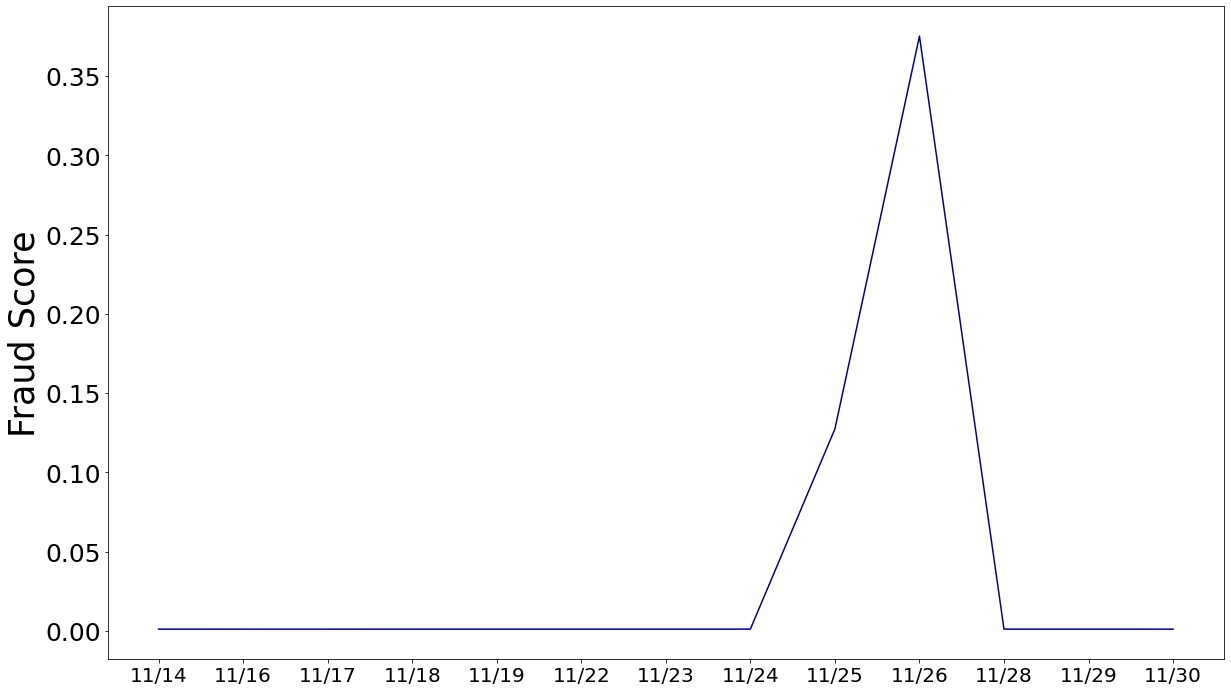

In [35]:
from matplotlib.pyplot import figure
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(20, 12))
y = df2['result'][10:]
x = df2.index[10:]
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)
plt.plot(x, y, color="navy")
plt.ylabel('Fraud Score',fontsize=35) 

plt.show()

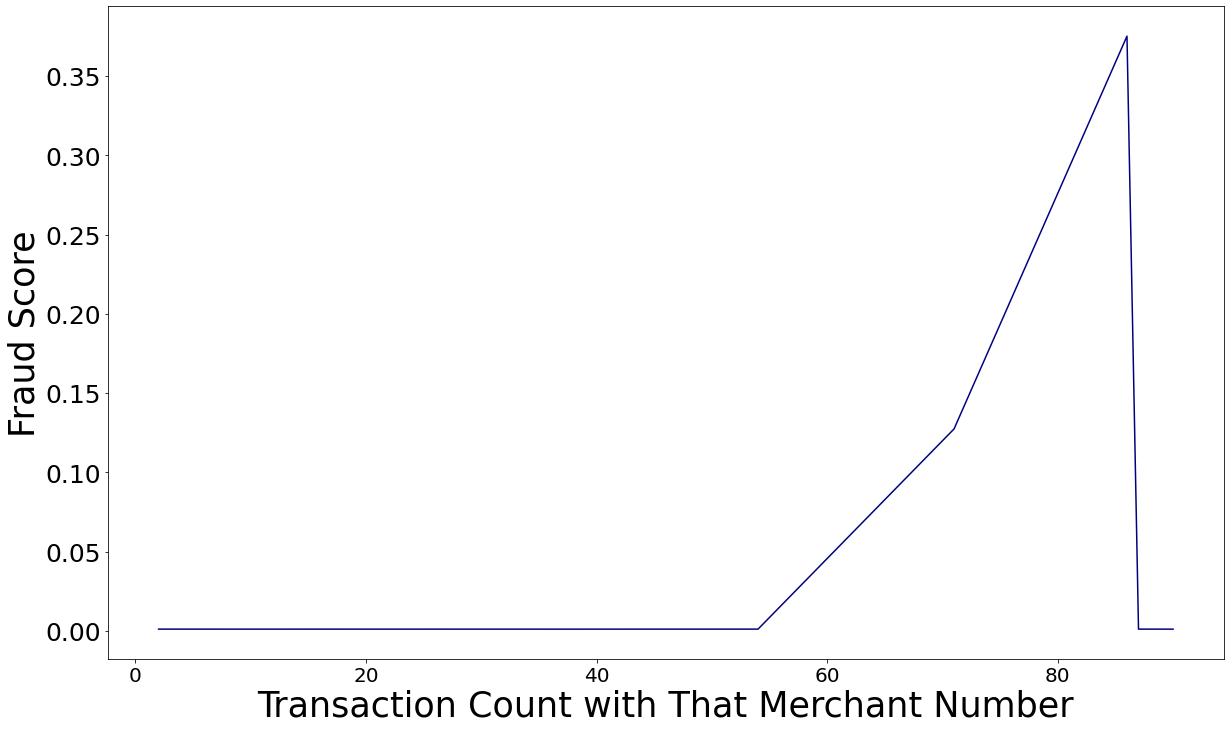

In [36]:
fig, ax = plt.subplots(figsize=(20, 12))
y = df2['result']
x = df2['sum']

plt.plot(x, y, color="navy")
plt.xlabel('Transaction Count with That Merchant Number',fontsize=35)      
plt.ylabel('Fraud Score',fontsize=35) 
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)

plt.show()

# Time dependence_cardnum

In [37]:
data = pd.read_csv('card transactions.csv')
vars_card = pd.read_csv('new_hw10vars.csv')

In [38]:
card = data.merge(vars_card, on='Recnum')
card = card.rename(columns={"Fraud_x": "Fraud"})
card.head()

,Recnum,Cardnum,Date_x,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount_x,Fraud,...,Amount_unique_count_for_Cardnum_3,Amount_unique_count_for_Cardnum_7,Amount_unique_count_for_Cardnum_14,Amount_unique_count_for_Cardnum_30,Amount_unique_count_for_Merchnum_0,Amount_unique_count_for_Merchnum_1,Amount_unique_count_for_Merchnum_3,Amount_unique_count_for_Merchnum_7,Amount_unique_count_for_Merchnum_14,Amount_unique_count_for_Merchnum_30
0,1,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,...,1,1,1,1,1,1,1,1,1,1
1,2,5142183973,2006-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,...,1,1,1,1,1,1,1,1,1,1
2,3,5142131721,2006-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,...,1,1,1,1,1,1,1,1,1,1
3,4,5142148452,2006-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,...,2,2,2,2,1,1,1,1,1,1
4,5,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,...,2,2,2,2,1,1,1,1,1,1


In [39]:
cardnum = 5142134797
card = card.loc[(card['Cardnum'] == cardnum)&(card['Date_x'] >= '2006-11-01')]
card = card.loc[: ,['Cardnum_total_0', 'Cardnum_total_1','Cardnum_total_3','Cardnum_total_7','Cardnum_total_14', 
              'card_state_total_1', 'card_state_total_3', 'card_state_total_7', 'card_state_total_14', 
              'card_zip_total_1','card_zip_total_3', 'card_zip_total_7', 'card_zip_total_14', 'card_zip_total_30', 
              'card_merch_total_1', 'card_merch_total_3', 'card_merch_total_7', 'card_merch_total_14', 
              'card_merch_total_30', 'merch_state_total_1', 'Cardnum','Date_x','Recnum','Fraud']]
card.head()

,Cardnum_total_0,Cardnum_total_1,Cardnum_total_3,Cardnum_total_7,Cardnum_total_14,card_state_total_1,card_state_total_3,card_state_total_7,card_state_total_14,card_zip_total_1,...,card_merch_total_1,card_merch_total_3,card_merch_total_7,card_merch_total_14,card_merch_total_30,merch_state_total_1,Cardnum,Date_x,Recnum,Fraud
84214,189.0,189.0,189.0,352.82,1646.49,189.0,189.0,189.0,189.0,189.0,...,189.0,189.0,189.0,189.0,189.0,189.0,5142134797,2006-11-02,84544,0
84246,378.0,378.0,378.0,541.82,1835.49,378.0,378.0,378.0,378.0,378.0,...,378.0,378.0,378.0,378.0,378.0,378.0,5142134797,2006-11-02,84576,0
84255,567.0,567.0,567.0,730.82,2024.49,567.0,567.0,567.0,567.0,567.0,...,567.0,567.0,567.0,567.0,567.0,567.0,5142134797,2006-11-02,84585,0
84259,756.0,756.0,756.0,919.82,2213.49,756.0,756.0,756.0,756.0,756.0,...,756.0,756.0,756.0,756.0,756.0,756.0,5142134797,2006-11-02,84589,0
84345,945.0,945.0,945.0,1108.82,2402.49,945.0,945.0,945.0,945.0,945.0,...,945.0,945.0,945.0,945.0,945.0,1114.0,5142134797,2006-11-02,84675,0


In [40]:
record_save = card['Recnum']
Y_card_save = pd.DataFrame(card.loc[:,'Fraud'])
Y_card_save.head()

,Fraud
84214,0
84246,0
84255,0
84259,0
84345,0


In [41]:
X_card_no_scaling = card.drop(columns = ['Recnum','Fraud','Cardnum','Date_x'])
X_card_no_scaling.describe()

,Cardnum_total_0,Cardnum_total_1,Cardnum_total_3,Cardnum_total_7,Cardnum_total_14,card_state_total_1,card_state_total_3,card_state_total_7,card_state_total_14,card_zip_total_1,card_zip_total_3,card_zip_total_7,card_zip_total_14,card_zip_total_30,card_merch_total_1,card_merch_total_3,card_merch_total_7,card_merch_total_14,card_merch_total_30,merch_state_total_1
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,305.061220,330.214878,440.520488,639.048049,1212.534878,212.390000,227.142683,271.777073,305.844390,209.881951,223.659024,242.632927,254.552195,255.357073,207.287561,211.153659,226.937805,238.313171,239.118049,292.905610
std,424.619104,421.942885,540.784949,626.602808,928.703073,333.908231,330.426109,340.307107,331.655996,334.828691,331.737642,327.921637,327.199017,326.684361,334.854331,333.043753,329.668209,328.823179,328.351873,422.250417
min,7.000000,7.000000,18.390000,19.000000,89.500000,7.000000,15.950000,15.950000,15.950000,7.000000,15.950000,15.950000,15.950000,15.950000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
25%,22.650000,33.000000,70.500000,112.330000,185.330000,22.650000,33.000000,60.330000,101.480000,22.650000,33.000000,40.000000,40.000000,50.000000,20.590000,22.650000,33.000000,33.000000,33.000000,22.650000
50%,73.000000,125.590000,189.000000,445.580000,1323.480000,51.770000,72.850000,123.730000,189.000000,50.000000,61.480000,108.740000,115.620000,115.620000,50.000000,51.770000,102.830000,112.000000,112.000000,99.000000
75%,341.990000,362.580000,485.310000,1108.820000,1991.870000,296.800000,337.990000,399.470000,432.470000,296.800000,337.990000,378.000000,378.000000,378.000000,296.800000,296.800000,296.800000,296.800000,296.800000,468.810000
max,1600.000000,1634.500000,1935.270000,2050.730000,3546.170000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1761.320000


In [42]:
X_card = (X_card_no_scaling - X_card_no_scaling.mean()) / X_card_no_scaling.std()
X_card.head()

,Cardnum_total_0,Cardnum_total_1,Cardnum_total_3,Cardnum_total_7,Cardnum_total_14,card_state_total_1,card_state_total_3,card_state_total_7,card_state_total_14,card_zip_total_1,card_zip_total_3,card_zip_total_7,card_zip_total_14,card_zip_total_30,card_merch_total_1,card_merch_total_3,card_merch_total_7,card_merch_total_14,card_merch_total_30,merch_state_total_1
84214,-0.273330,-0.334678,-0.465103,-0.456793,0.467270,-0.070049,-0.115435,-0.243242,-0.352306,-0.062366,-0.104477,-0.163554,-0.200343,-0.203123,-0.054613,-0.066519,-0.115079,-0.149969,-0.152635,-0.246076
84246,0.171775,0.113250,-0.115611,-0.155167,0.670780,0.495975,0.456554,0.312138,0.217562,0.502102,0.465250,0.412803,0.377287,0.375417,0.509811,0.500974,0.458225,0.424808,0.422967,0.201526
84255,0.616879,0.561178,0.233881,0.146460,0.874289,1.061998,1.028543,0.867519,0.787429,1.066569,1.034977,0.989160,0.954917,0.953957,1.074236,1.068467,1.031529,0.999585,0.998569,0.649128
84259,1.061984,1.009106,0.583373,0.448086,1.077799,1.628022,1.600531,1.422900,1.357297,1.631037,1.604705,1.565518,1.532547,1.532497,1.638660,1.635960,1.604832,1.574362,1.574171,1.096729
84345,1.507089,1.457034,0.932865,0.749712,1.281308,2.194046,2.172520,1.978281,1.927164,2.195505,2.174432,2.141875,2.110177,2.111037,2.203085,2.203453,2.178136,2.149139,2.149773,1.944567


In [43]:
# push in any outlier values
cols = X_card.columns
X_card.loc[:,cols] = X_card[cols].clip(upper=Clip)
X_card.loc[:,cols] = X_card[cols].clip(lower=-1*Clip)
# X = (X_no_scaling - X_no_scaling.mean()) / X_no_scaling.std()
X_card.describe()

,Cardnum_total_0,Cardnum_total_1,Cardnum_total_3,Cardnum_total_7,Cardnum_total_14,card_state_total_1,card_state_total_3,card_state_total_7,card_state_total_14,card_zip_total_1,card_zip_total_3,card_zip_total_7,card_zip_total_14,card_zip_total_30,card_merch_total_1,card_merch_total_3,card_merch_total_7,card_merch_total_14,card_merch_total_30,merch_state_total_1
count,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,1.083144e-17,2.057974e-16,7.582011e-17,-6.498866e-17,-2.166289e-17,-1.299773e-16,-8.665155e-17,-9.748300e-17,-1.299773e-16,0.000000,-4.332578e-17,-4.332578e-17,-1.299773e-16,-8.665155e-17,-4.332578e-17,-1.299773e-16,-1.083144e-16,4.332578e-17,2.166289e-17,5.415722e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.019496e-01,-7.660157e-01,-7.805885e-01,-9.895392e-01,-1.209251e+00,-6.151091e-01,-6.391525e-01,-7.517535e-01,-8.740816e-01,-0.605928,-6.261244e-01,-6.912716e-01,-7.292265e-01,-7.328391e-01,-5.981334e-01,-6.129935e-01,-6.671490e-01,-7.034576e-01,-7.069186e-01,-6.770997e-01
25%,-6.650931e-01,-7.043960e-01,-6.842285e-01,-8.405932e-01,-1.106064e+00,-5.682400e-01,-5.875525e-01,-6.213419e-01,-6.161939e-01,-0.559187,-5.747283e-01,-6.179309e-01,-6.557238e-01,-6.286101e-01,-5.575486e-01,-5.660027e-01,-5.882818e-01,-6.243878e-01,-6.277353e-01,-6.400363e-01
50%,-5.465162e-01,-4.849587e-01,-4.651026e-01,-3.087571e-01,1.194624e-01,-4.810304e-01,-4.669506e-01,-4.350396e-01,-3.523060e-01,-0.477504,-4.888774e-01,-4.083077e-01,-4.246107e-01,-4.277434e-01,-4.697194e-01,-4.785667e-01,-3.764628e-01,-3.841371e-01,-3.871397e-01,-4.592195e-01
75%,8.696919e-02,7.670498e-02,8.282315e-02,7.497125e-01,8.391650e-01,2.527940e-01,3.354678e-01,3.752285e-01,3.817980e-01,0.259590,3.446428e-01,4.128031e-01,3.772866e-01,3.754172e-01,2.673175e-01,2.571624e-01,2.119167e-01,1.778671e-01,1.756712e-01,4.165878e-01
max,3.049648e+00,3.091141e+00,2.764037e+00,2.252914e+00,2.512789e+00,4.155663e+00,4.154809e+00,3.903013e+00,3.902102e+00,4.151729,4.148884e+00,4.139303e+00,4.112017e+00,4.116031e+00,4.159159e+00,4.170162e+00,4.164982e+00,4.141091e+00,4.144584e+00,3.477591e+00


In [44]:
niter = 0
nitermax = 10

In [45]:
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

model = MLPClassifier(hidden_layer_sizes=(110,1),activation='logistic')

X_oot = X_oot_orig.copy()
X_trn_save = X_trn.copy()
Y_trn_save = Y_trn.copy()

model.fit(X_trn, Y_trn.values.ravel())

predictions = model.predict_proba(X_card)[:,1]

In [46]:
X_card['predicted']=predictions

In [47]:
X_card = X_card.merge(card, left_on=X_card.index, right_on=card.index, how='left')

In [48]:
X_card['Date_x'] = X_card['Date_x'].astype('datetime64[ns]')
X_card['Date_md'] = X_card['Date_x'].dt.strftime('%m/%d')

In [49]:
df = X_card.groupby('Date_md').count()
df['sum'] = df['key_0'].cumsum()
df['result'] = X_card.groupby('Date_md')['predicted'].mean()
df = df[['key_0','sum','result']]
df

,key_0,sum,result
Date_md,,,
11/02,5,5,0.057182
11/11,2,7,0.000804
11/24,2,9,0.000814
11/30,1,10,0.000815
12/07,4,14,0.000811
12/08,1,15,0.000813
12/09,1,16,0.000810
12/10,1,17,0.000821
12/13,2,19,0.000811


In [50]:
df3 = df.iloc[4:]
df3

,key_0,sum,result
Date_md,,,
12/07,4,14,0.000811
12/08,1,15,0.000813
12/09,1,16,0.000810
12/10,1,17,0.000821
12/13,2,19,0.000811
12/14,3,22,0.855278
12/15,1,23,0.000803
12/16,1,24,0.000959
12/17,6,30,0.216596


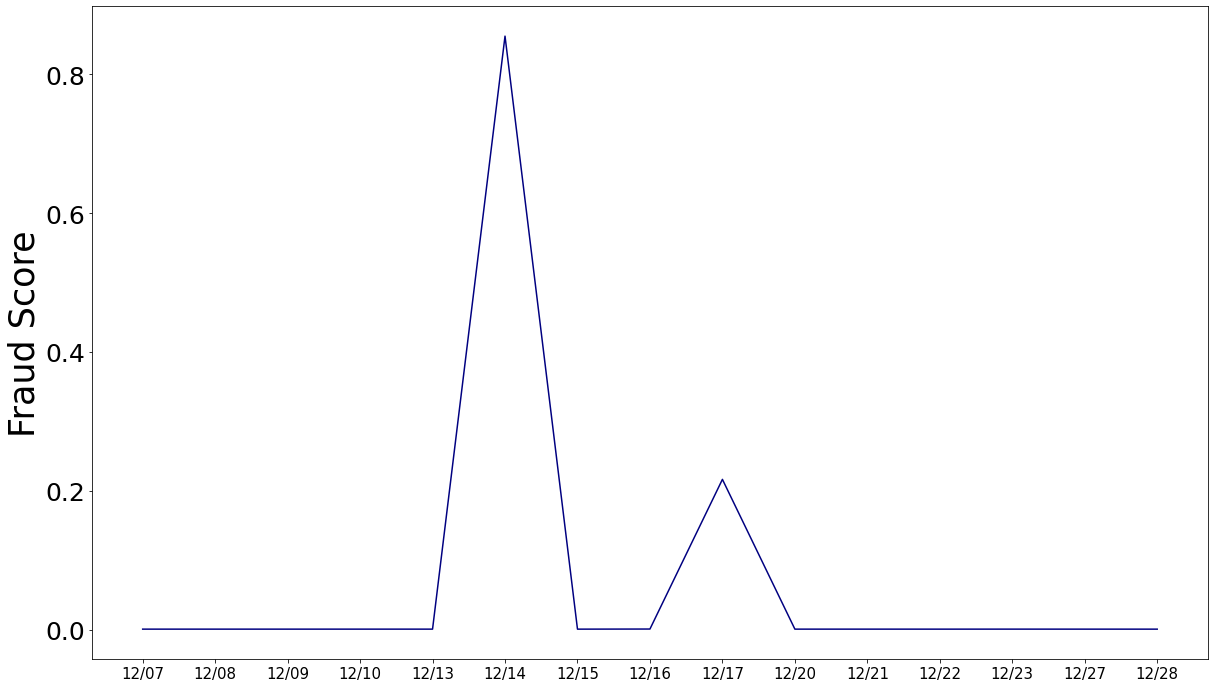

In [51]:
from matplotlib.pyplot import figure
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(20, 12))
y = df3['result'][:15]
x = df3.index[:15]
plt.xticks(fontsize=15)
plt.yticks(fontsize=25)
plt.plot(x, y, color="navy")
plt.ylabel('Fraud Score',fontsize=35) 

plt.show()

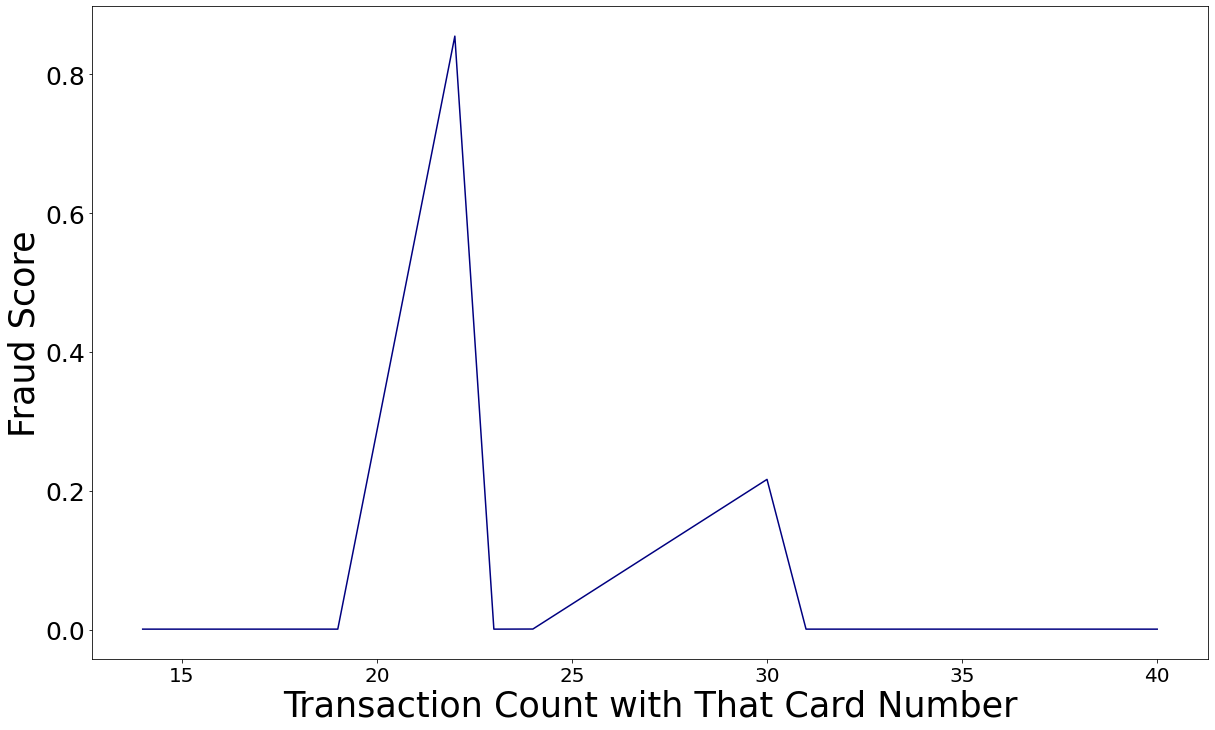

In [52]:
fig, ax = plt.subplots(figsize=(20, 12))
y = df3['result'][:15]
x = df3['sum'][:15]

plt.plot(x, y, color="navy")
plt.xlabel('Transaction Count with That Card Number',fontsize=35)      
plt.ylabel('Fraud Score',fontsize=35) 
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)

plt.show()

# The rest of the notebook makes the tables for your final model of choice. You need to run that final model only once (no CV). If you want you can run the below cell over and over by itself until it gives you a model you like. But you can't change from your best hyperparameters.

In [67]:
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

# here's where you put your final model of choice
model = MLPClassifier(
        hidden_layer_sizes=(60),
        alpha=0.01,
        learning_rate='adaptive'
        )

X_oot = X_oot_orig.copy()
X_trn_save = X_trn.copy()
Y_trn_save = Y_trn.copy()

model.fit(X_trn, Y_trn.values.ravel())   

predictions = model.predict_proba(X_trn_save)[:,1]
X_trn['predicted'] = predictions
X_trn['Fraud'] = Y_trn_save['Fraud']
topRows = int(round(X_trn.shape[0]*0.03))
temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
needed = temp.loc[:,'Fraud']
FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

predictions = model.predict_proba(X_tst)[:,1]
X_tst['predicted']=predictions
X_tst['Fraud'] = Y_tst['Fraud']
topRows = int(round(X_tst.shape[0]*0.03))
temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
needed = temp.loc[:,'Fraud']
FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

predictions = model.predict_proba(X_oot)[:,1]
X_oot['predicted']=predictions
X_oot['Fraud'] = Y_oot['Fraud']
topRows = int(round(X_oot.shape[0]*0.03))
temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
needed = temp.loc[:,'Fraud']
FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])

0 0.7658227848101266 0.717741935483871 0.5810055865921788


In [68]:
X_trn_eval = X_trn.copy()
X_tst_eval = X_tst.copy()
X_oot_eval = X_oot.copy()

In [69]:
cols = ['bin','#recs','#g','#b','%g','%b','tot','cg','cb','%cg','FDR','KS','FPR']
FDR_trn = pd.DataFrame(np.zeros((101, 13)), columns = cols)
FDR_tst = pd.DataFrame(np.zeros((101, 13)), columns = cols)
FDR_oot = pd.DataFrame(np.zeros((101, 13)), columns = cols)
trn_sorted = X_trn_eval.sort_values('predicted',ascending=False)
tst_sorted = X_tst_eval.sort_values('predicted',ascending=False)
oot_sorted = X_oot_eval.sort_values('predicted',ascending=False)
bad_tot_trn = sum(X_trn_eval.loc[:, 'Fraud'])
bad_tot_tst = sum(X_tst_eval.loc[:, 'Fraud'])
bad_tot_oot = sum(X_oot_eval.loc[:, 'Fraud'])
num_tot_trn = len(X_trn_eval)
num_tot_tst = len(X_tst_eval)
num_tot_oot = len(X_oot_eval)
good_tot_trn = num_tot_trn - bad_tot_trn
good_tot_tst = num_tot_tst - bad_tot_tst
good_tot_oot = num_tot_oot - bad_tot_oot
oot_sorted.head(20)

,Cardnum_total_0,Cardnum_total_1,Cardnum_total_3,Cardnum_total_7,Cardnum_total_14,card_state_total_1,card_state_total_3,card_state_total_7,card_state_total_14,card_zip_total_1,...,card_zip_total_14,card_zip_total_30,card_merch_total_1,card_merch_total_3,card_merch_total_7,card_merch_total_14,card_merch_total_30,merch_state_total_1,predicted,Fraud
89183,5.216910,7.087874,6.504998,5.435530,4.017608,10.000000,9.841725,9.511901,8.905789,10.000000,...,9.671090,9.274594,10.000000,10.000000,9.892951,9.715274,9.372808,9.206855,1.000000,1
89186,5.273533,7.122145,6.536769,5.462672,4.038230,10.000000,9.888875,9.557657,8.948894,10.000000,...,9.717500,9.319304,10.000000,10.000000,9.940292,9.761860,9.417926,9.251389,1.000000,1
89174,4.722993,6.788929,6.227858,5.198769,3.837724,9.604499,9.430439,9.112782,8.529791,9.693923,...,9.266261,8.884590,9.700303,9.590641,9.479999,9.308917,8.979254,8.818394,1.000000,1
89134,4.563535,6.692416,6.138385,5.122333,3.779650,9.469543,9.297659,8.983929,8.408403,9.557895,...,9.135566,8.758681,9.564206,9.455973,9.346681,9.177727,8.852198,8.692982,1.000000,1
89130,4.476650,6.639829,6.089634,5.080684,3.748006,9.396008,9.225310,8.913720,8.342261,9.483777,...,9.064353,8.690076,9.490050,9.382596,9.274039,9.106245,8.782968,8.624648,1.000000,1
89129,2.058827,5.176433,4.732979,3.921695,2.867439,7.349688,7.211987,6.959950,6.501674,7.421224,...,7.082637,6.780932,7.426444,7.340656,7.252561,7.117044,6.856440,6.723054,1.000000,1
89128,1.949226,5.110096,4.671481,3.869157,2.827523,7.256928,7.120722,6.871384,6.418240,7.327727,...,6.992805,6.694390,7.332900,7.248094,7.160926,7.026872,6.769109,6.636854,1.000000,1
89121,1.812593,5.027398,4.594815,3.803661,2.777761,7.141288,7.006948,6.760975,6.314226,7.211171,...,6.880816,6.586503,7.216284,7.132702,7.046691,6.914461,6.660239,6.529393,1.000000,1
89120,1.334512,4.738038,4.326561,3.574492,2.603645,6.736665,6.608849,6.374652,5.950283,6.803338,...,6.488967,6.209004,6.808243,6.728945,6.646980,6.521132,6.279303,6.153386,1.000000,1
89117,1.231150,4.675478,4.268564,3.524945,2.566001,6.649185,6.522780,6.291128,5.871598,6.715164,...,6.404249,6.127388,6.720024,6.641652,6.560562,6.436094,6.196944,6.072093,1.000000,1


In [70]:
for i in range(101):
    percent_rows_trn = int(round(X_trn_eval.shape[0]*0.01*i))
    percent_rows_tst = int(round(X_tst_eval.shape[0]*0.01*i))
    percent_rows_oot = int(round(X_oot_eval.shape[0]*0.01*i))
    temp_trn = trn_sorted.head(percent_rows_trn)
    temp_tst = tst_sorted.head(percent_rows_tst)
    temp_oot = oot_sorted.head(percent_rows_oot)
    num_bad_trn = sum(temp_trn.loc[:,'Fraud'])
    num_bad_tst = sum(temp_tst.loc[:,'Fraud'])
    num_bad_oot = sum(temp_oot.loc[:,'Fraud'])
    num_tot_trn = len(temp_trn)
    num_tot_tst = len(temp_tst)
    num_tot_oot = len(temp_oot)
    num_good_trn = num_tot_trn - num_bad_trn
    num_good_tst = num_tot_tst - num_bad_tst
    num_good_oot = num_tot_oot - num_bad_oot
    
    FDR_trn.loc[i, 'bin'] = i
    FDR_trn.loc[i,'#recs'] = 0
    FDR_trn.loc[i, 'tot'] = num_tot_trn
    FDR_trn.loc[i, 'cg'] = num_good_trn
    FDR_trn.loc[i, 'cb'] = num_bad_trn
    FDR_tst.loc[i, 'bin'] = i
    FDR_tst.loc[i, 'tot'] = num_tot_tst
    FDR_tst.loc[i, 'cg'] = num_good_tst
    FDR_tst.loc[i, 'cb'] = num_bad_tst
    FDR_oot.loc[i, 'bin'] = i
    FDR_oot.loc[i, 'tot'] = num_tot_oot
    FDR_oot.loc[i, 'cg'] = num_good_oot
    FDR_oot.loc[i, 'cb'] = num_bad_oot
    if i != 0:
        FDR_trn.loc[i, '#g'] = num_good_trn - FDR_trn.loc[i-1, 'cg']
        FDR_trn.loc[i, '#b'] = num_bad_trn - FDR_trn.loc[i-1, 'cb']
        FDR_trn.loc[i,'#recs'] = FDR_trn.loc[i, '#g'] + FDR_trn.loc[i, '#b']
        FDR_trn.loc[i, '%g'] = 100* (num_good_trn - FDR_trn.loc[i-1, 'cg']) / (num_tot_trn - FDR_trn.loc[i-1, 'tot'])
        FDR_trn.loc[i, '%b'] = 100 - FDR_trn.loc[i, '%g']
        FDR_trn.loc[i, '%cg'] = 100 * num_good_trn / good_tot_trn
        FDR_trn.loc[i, 'FDR'] = 100 * num_bad_trn / bad_tot_trn
        FDR_trn.loc[i, 'KS'] = FDR_trn.loc[i, 'FDR'] - FDR_trn.loc[i, '%cg']
        FDR_trn.loc[i, 'FPR'] = num_good_trn / num_bad_trn
        FDR_tst.loc[i, '#g'] = num_good_tst - FDR_tst.loc[i-1, 'cg']
        FDR_tst.loc[i, '#b'] = num_bad_tst - FDR_tst.loc[i-1, 'cb']
        FDR_tst.loc[i,'#recs'] = FDR_tst.loc[i, '#g'] + FDR_tst.loc[i, '#b']
        FDR_tst.loc[i, '%g'] = 100* (num_good_tst - FDR_tst.loc[i-1, 'cg']) / (num_tot_tst - FDR_tst.loc[i-1, 'tot'])
        FDR_tst.loc[i, '%b'] = 100 - FDR_tst.loc[i, '%g']
        FDR_tst.loc[i, '%cg'] = 100 * num_good_tst / good_tot_tst
        FDR_tst.loc[i, 'FDR'] = 100 * num_bad_tst / bad_tot_tst
        FDR_tst.loc[i, 'KS'] = FDR_tst.loc[i, 'FDR'] - FDR_tst.loc[i, '%cg']
        FDR_tst.loc[i, 'FPR'] = num_good_tst / num_bad_tst
        FDR_oot.loc[i, '#g'] = num_good_oot - FDR_oot.loc[i-1, 'cg']
        FDR_oot.loc[i, '#b'] = num_bad_oot - FDR_oot.loc[i-1, 'cb']
        FDR_oot.loc[i,'#recs'] = FDR_oot.loc[i, '#g'] + FDR_oot.loc[i, '#b']
        FDR_oot.loc[i, '%g'] = 100* (num_good_oot - FDR_oot.loc[i-1, 'cg']) / (num_tot_oot - FDR_oot.loc[i-1, 'tot'])
        FDR_oot.loc[i, '%b'] = 100 - FDR_oot.loc[i, '%g']
        FDR_oot.loc[i, '%cg'] = 100 * num_good_oot / good_tot_oot
        FDR_oot.loc[i, 'FDR'] = 100 * num_bad_oot / bad_tot_oot
        FDR_oot.loc[i, 'KS'] = FDR_oot.loc[i, 'FDR'] - FDR_oot.loc[i, '%cg']
        FDR_oot.loc[i, 'FPR'] = num_good_oot / num_bad_oot

FDR_oot

,bin,#recs,#g,#b,%g,%b,tot,cg,cb,%cg,FDR,KS,FPR
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,1.0,121.0,59.0,62.0,48.760331,51.239669,121.0,59.0,62.0,0.495050,34.636872,34.141822,0.951613
2,2.0,121.0,93.0,28.0,76.859504,23.140496,242.0,152.0,90.0,1.275382,50.279330,49.003948,1.688889
3,3.0,121.0,107.0,14.0,88.429752,11.570248,363.0,259.0,104.0,2.173183,58.100559,55.927375,2.490385
4,4.0,121.0,112.0,9.0,92.561983,7.438017,484.0,371.0,113.0,3.112938,63.128492,60.015553,3.283186
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96.0,121.0,121.0,0.0,100.000000,0.000000,11613.0,11434.0,179.0,95.938916,100.000000,4.061084,63.877095
97,97.0,121.0,121.0,0.0,100.000000,0.000000,11734.0,11555.0,179.0,96.954187,100.000000,3.045813,64.553073
98,98.0,121.0,121.0,0.0,100.000000,0.000000,11855.0,11676.0,179.0,97.969458,100.000000,2.030542,65.229050
99,99.0,121.0,121.0,0.0,100.000000,0.000000,11976.0,11797.0,179.0,98.984729,100.000000,1.015271,65.905028


In [75]:
FDR_oot['fraud_savings'] = FDR_oot['cb']*2000*6
FDR_oot['lost_sales'] = FDR_oot['cg']*50*6
FDR_oot['overall_savings'] = (FDR_oot['fraud_savings']-FDR_oot['lost_sales'])
FDR_oot.head(15)

,bin,#recs,#g,#b,%g,%b,tot,cg,cb,%cg,FDR,KS,FPR,fraud_savings,lost_sales,overall_savings
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,1.0,121.0,59.0,62.0,48.760331,51.239669,121.0,59.0,62.0,0.495050,34.636872,34.141822,0.951613,744000.0,17700.0,726300.0
2,2.0,121.0,93.0,28.0,76.859504,23.140496,242.0,152.0,90.0,1.275382,50.279330,49.003948,1.688889,1080000.0,45600.0,1034400.0
3,3.0,121.0,107.0,14.0,88.429752,11.570248,363.0,259.0,104.0,2.173183,58.100559,55.927375,2.490385,1248000.0,77700.0,1170300.0
4,4.0,121.0,112.0,9.0,92.561983,7.438017,484.0,371.0,113.0,3.112938,63.128492,60.015553,3.283186,1356000.0,111300.0,1244700.0
5,5.0,121.0,116.0,5.0,95.867769,4.132231,605.0,487.0,118.0,4.086256,65.921788,61.835532,4.127119,1416000.0,146100.0,1269900.0
6,6.0,121.0,118.0,3.0,97.520661,2.479339,726.0,605.0,121.0,5.076355,67.597765,62.521410,5.000000,1452000.0,181500.0,1270500.0
7,7.0,121.0,117.0,4.0,96.694215,3.305785,847.0,722.0,125.0,6.058063,69.832402,63.774339,5.776000,1500000.0,216600.0,1283400.0
8,8.0,121.0,118.0,3.0,97.520661,2.479339,968.0,840.0,128.0,7.048162,71.508380,64.460217,6.562500,1536000.0,252000.0,1284000.0
9,9.0,121.0,121.0,0.0,100.000000,0.000000,1089.0,961.0,128.0,8.063433,71.508380,63.444946,7.507812,1536000.0,288300.0,1247700.0


In [72]:
FDR_oot_2 = FDR_oot.loc[FDR_oot['bin'] < 50]

<function matplotlib.pyplot.show(close=None, block=None)>

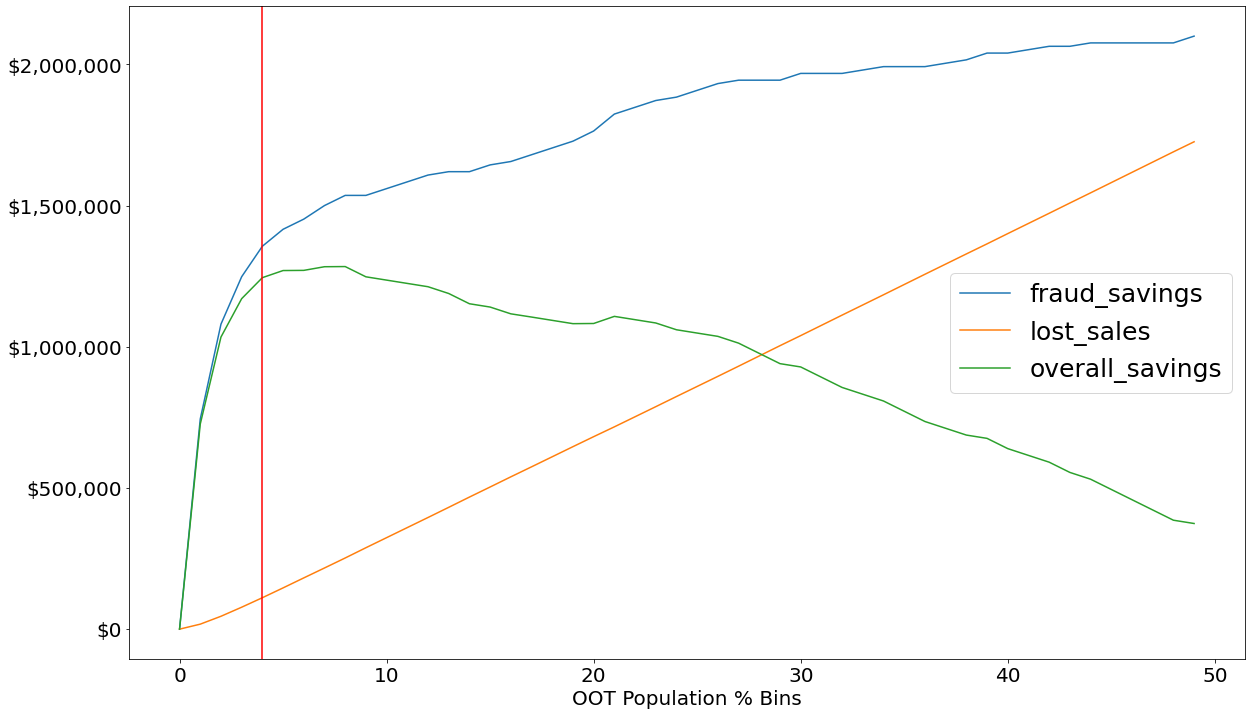

In [76]:
# plot multiple columns such as population and year from dataframe

fig, ax = plt.subplots(figsize=(20, 12))

FDR_oot_2.plot(x='bin', y=['fraud_savings','lost_sales','overall_savings'],
        kind="line", ax=ax)
plt.xlabel('OOT Population % Bins',fontsize=20) 
plt.legend(loc="center right", prop={'size': 25})  
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ticklabel_format(style='plain')
ax.yaxis.set_major_formatter('${x:,.0f}')
plt.axvline(x=4,color='red',linestyle='-')

# ax.yaxis.set_tick_params(which='major', labelcolor='green',
#                          labelleft=False, labelright=True)

# plt.yticks(np.arange(0,2100000,300000))
# y_tick_labels = ['$300,000','$600,000','$900,000','$1,200,000','$1,500,000','$1,800,000','$2,100,000']
# plt.yticks(range(7),y_tick_labels)
plt.show

In [61]:
FDR_oot['fraud_savings_2'] = FDR_oot['FDR']/100*FDR_oot['cb']*2000
FDR_oot['lost_sales_2'] = FDR_oot['FPR']/100*FDR_oot['cb']*50
FDR_oot['overall_savings_2'] = (FDR_oot['fraud_savings_2']-FDR_oot['lost_sales_2'])
FDR_oot

,bin,#recs,#g,#b,%g,%b,tot,cg,cb,%cg,FDR,KS,FPR,fraud_savings,lost_sales,overall_savings,fraud_savings_2,lost_sales_2,overall_savings_2
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
1,1.0,121.0,56.0,65.0,46.280992,53.719008,121.0,56.0,65.0,0.469877,36.312849,35.842972,0.861538,780000.0,16800.0,763200.0,47206.703911,28.0,47178.703911
2,2.0,121.0,97.0,24.0,80.165289,19.834711,242.0,153.0,89.0,1.283772,49.720670,48.436898,1.719101,1068000.0,45900.0,1022100.0,88502.793296,76.5,88426.293296
3,3.0,121.0,109.0,12.0,90.082645,9.917355,363.0,262.0,101.0,2.198355,56.424581,54.226226,2.594059,1212000.0,78600.0,1133400.0,113977.653631,131.0,113846.653631
4,4.0,121.0,115.0,6.0,95.041322,4.958678,484.0,377.0,107.0,3.163282,59.776536,56.613254,3.523364,1284000.0,113100.0,1170900.0,127921.787709,188.5,127733.287709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96.0,121.0,120.0,1.0,99.173554,0.826446,11613.0,11439.0,174.0,95.980869,97.206704,1.225835,65.741379,2088000.0,3431700.0,-1343700.0,338279.329609,5719.5,332559.829609
97,97.0,121.0,118.0,3.0,97.520661,2.479339,11734.0,11557.0,177.0,96.970968,98.882682,1.911713,65.293785,2124000.0,3467100.0,-1343100.0,350044.692737,5778.5,344266.192737
98,98.0,121.0,121.0,0.0,100.000000,0.000000,11855.0,11678.0,177.0,97.986239,98.882682,0.896442,65.977401,2124000.0,3503400.0,-1379400.0,350044.692737,5839.0,344205.692737
99,99.0,121.0,120.0,1.0,99.173554,0.826446,11976.0,11798.0,178.0,98.993120,99.441341,0.448221,66.280899,2136000.0,3539400.0,-1403400.0,354011.173184,5899.0,348112.173184


In [62]:
# FDR_oot_3 = FDR_oot.loc[FDR_oot['bin']]

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

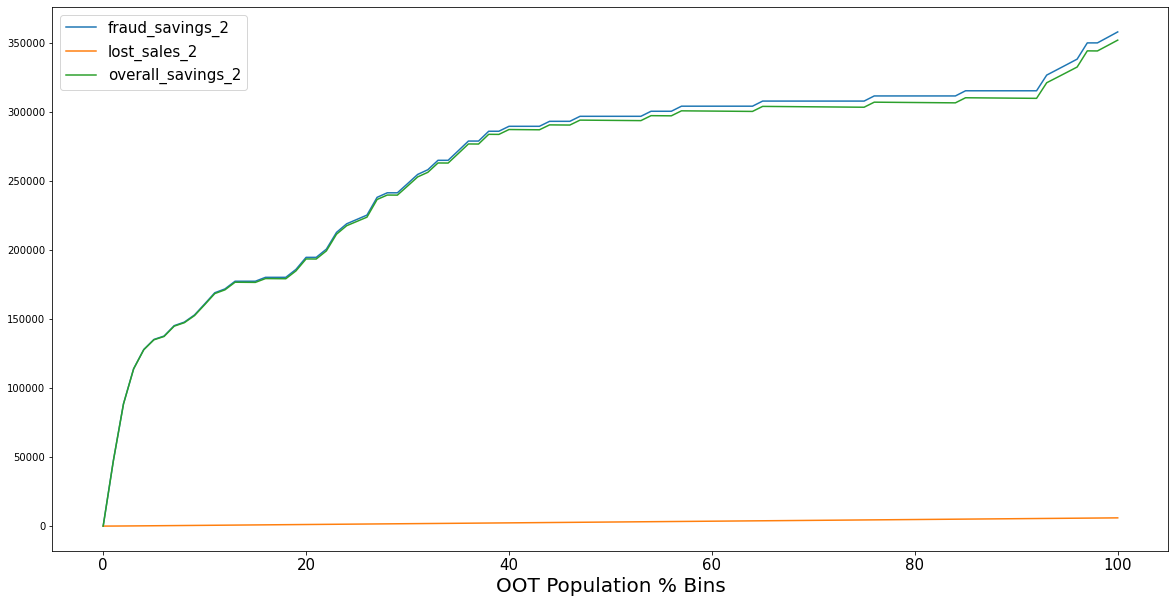

In [63]:
FDR_oot.plot(x='bin', y=['fraud_savings_2','lost_sales_2','overall_savings_2'],
        kind="line", figsize=(20, 10))
plt.legend(loc=2, prop={'size': 15})      
plt.xlabel('OOT Population % Bins',fontsize=20) 
plt.xticks(fontsize=15)

In [64]:
FDR3.to_csv('FDR3.csv')

In [65]:
FDR_trn.to_csv('FDR_trn.csv', index=False)
FDR_tst.to_csv('FDR_tst.csv', index=False)
FDR_oot.to_csv('FDR_oot.csv', index=False)

In [66]:
print("duration: ", datetime.now() - start_time)

duration:  0:27:01.748416
